In [1]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# # 데이터베이스 연결 설정
# config = {
#   'user': 'root',
#   'password': '00000000',
#   'host': 'localhost',
#   'database': 'zerobase',
#   'raise_on_warnings': True
# }

# # 연결 생성
# connection = mysql.connector.connect(**config)

# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''select count(*)
#                   from (
#                         select customer_unique_id, count(customer_unique_id) as customer_count
#                         from olist_customers_dataset
#                         group by customer_unique_id
#                         having count(customer_unique_id) > 1
#                         order by count(customer_unique_id)
#                   ) a
# ''')
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

# # 커서 및 연결 닫기
# cursor.close()


* 고객 중 2번 이상 구매한 고객은 2,997명이다.

* 고객 테이블 고객id와 주문 테이블 고객id가 1:1 대응이다. 즉, 미사용 고객은 없다.

* 고객이 주문 할 때 customer_id가 생기고, 이는 order_id와 결합된다.
* 즉, 한 건의 주문(order_id)가 생성되면, customer_id가 하나 생성된다.

* 휴면고객은 총 43,347명이다.

* 휴면고객 데이터셋은 총 44,639행. 즉, 두 번 이상 구매한 고객이 있다.

* 휴면고객들의 평점 평균 또한 괜찮았음. 어떤것 때문에 1년이상 물건을 구매하지 않을까?

* 리뷰로 파악하려 했으나, 스페인어 모르겠음.
* 번역 하는 걸로 대치가능한지 찾아봐야하려나..?
* 일단 스킵

* 두번 이상 주문한 고객은 총 1,198명이다.

In [2]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''
#     select 
#         a.order_id,
#         a.customer_id,
#         a.order_status,
#         a.order_purchase_timestamp,
#         a.order_approved_at,
#         a.order_delivered_carrier_date,
#         a.order_delivered_customer_date,
#         a.order_estimated_delivery_date,
#         b.order_item_id,
#         b.product_id,
#         b.seller_id,
#         b.shipping_limit_date,
#         b.price,
#         b.freight_value,
#         e.product_category_name_english,
#         c.product_name_lenght,
#         c.product_description_lenght,
#         c.product_photos_qty,
#         c.product_weight_g,
#         c.product_length_cm,
#         c.product_height_cm,
#         c.product_width_cm,
#         d.review_id,
#         d.review_score,
#         d.review_comment_title,
#         d.review_comment_message,
#         d.review_creation_date,
#         d.review_answer_timestamp 
#     from olist_orders_dataset a
#     left join olist_order_items_dataset b
#     on a.order_id = b.order_id
#     left join olist_products_dataset c
#     on b.product_id = c.product_id
#     left join olist_order_reviews_dataset d
#     on a.order_id = d.order_id
#     left join product_category_name_translation e
#     on c.product_category_name = e.`﻿product_category_name` 
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 두번 이상 구매한 고객들은 어떤 것들을 구매했을까?
# df_order = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_order

In [3]:
# # 커서 생성
# cursor = connection.cursor()

# # 여기서 쿼리를 실행하거나 다른 작업을 수행할 수 있습니다.
# cursor.execute('''
#     select 
#         e.order_id,
#         e.payment_sequential,
#         e.payment_type,
#         e.payment_installments,
#         e.payment_value,
#         f.customer_id,
#         f.customer_unique_id,
#         f.customer_zip_code_prefix,
#         f.customer_city,
#         f.customer_state,
#         g.geolocation_zip_code_prefix,
#         g.geolocation_lat,
#         g.geolocation_lng,
#         g.geolocation_city,
#         g.geolocation_state,
#         h.seller_id,
#         h.seller_city,
#         h.seller_state,
#         h.seller_zip_code_prefix
#     from olist_orders_dataset a
#     left join olist_order_items_dataset b
#     on a.order_id = b.order_id
#     left join olist_order_payments_dataset e
#     on a.order_id = e.order_id
#     left join olist_customers_dataset f
#     on a.customer_id = f.customer_id
#     left join (
#         select
#             geolocation_zip_code_prefix,
#             avg(geolocation_lat) as geolocation_lat,
#             avg(geolocation_lng) as geolocation_lng,
#             geolocation_city,
#             geolocation_state 
#         from olist_geolocation_dataset
#         group by geolocation_zip_code_prefix, geolocation_city, geolocation_state
#         order by geolocation_zip_code_prefix
#     ) g
#     on f.customer_zip_code_prefix = g.geolocation_zip_code_prefix
#     left join olist_sellers_dataset h
#     on b.seller_id = h.seller_id
# ''')

# # 컬럼명 가져오기
# columns = [desc[0] for desc in cursor.description]

# # 두번 이상 구매한 고객들은 어떤 것들을 구매했을까?
# df_customer = pd.DataFrame(cursor.fetchall(), columns=columns)

# # 커서 및 연결 닫기
# cursor.close()

# df_customer

In [4]:
# import numpy as np

# print(len(df_order[df_order['order_id'] == np.NaN]))
# print(len(df_customer[df_customer['order_id'] == np.NaN]))

In [5]:
# df = pd.merge(df_customer, df_order, on='order_id', how='left')
df = pd.read_csv('../datas/olist_total.csv', encoding='utf8')
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,1000.0,25.0,25.0,25.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115033,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115034,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,21.0,7.0,14.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115035,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,200.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship


In [6]:
# 'order_purchase_timestamp'를 datetime 형식으로 변환
# df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# 'sleep_customer' 컬럼 생성
# df['sleep_customer'] = df['order_purchase_timestamp'].apply(lambda x: 'Yes' if x <= pd.Timestamp('2017-12-31') else 'No')
# df.drop('order_purchase_timestamp', axis=1, inplace=True)
# df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
# df

In [7]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,1000.0,25.0,25.0,25.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115033,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115034,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,21.0,7.0,14.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115035,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,200.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship


In [8]:
print(df_no_duplicates.dtypes)

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_unique_

In [9]:
# null(None) 값이 들어있는 데이터 각 컬럼별로 집계
null_rows_selector = df_no_duplicates.isnull().any(axis=1)
null_row_count = df_no_duplicates[null_rows_selector].shape[0]

df_null = df_no_duplicates.isnull().sum().reset_index()
df_null.columns = ['feature', 'missing_count']
df_null['missing_percentage'] = (df_null['missing_count'] / len(df_no_duplicates)) * 100
df_null = df_null[df_null.missing_count != 0].sort_values(by='missing_percentage', ascending=False)

print("Rows with null values: ", null_row_count, ", {:.2f}%".format((null_row_count / len(df_no_duplicates) * 100)))
print('Columns with null values: ', df_null.shape[0])

df_null

Rows with null values:  103507 , 89.98%
Columns with null values:  9


,feature,missing_count,missing_percentage
20,review_comment_title,101302,88.060363
21,review_comment_message,66357,57.683180
12,order_delivered_customer_date,2384,2.072377
11,order_delivered_carrier_date,1185,1.030103
10,order_approved_at,14,0.012170
34,product_weight_g,1,0.000869
35,product_length_cm,1,0.000869
36,product_height_cm,1,0.000869
37,product_width_cm,1,0.000869


In [10]:
# 결측치가 30% 아래인 컬럼만 선정한다고 가정, 두 개의 컬럼 제외
df_no_duplicates.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

# null(None) 값이 들어있는 데이터 각 컬럼별로 집계
null_rows_selector = df_no_duplicates.isnull().any(axis=1)
null_row_count = df_no_duplicates[null_rows_selector].shape[0]

df_null = df_no_duplicates.isnull().sum().reset_index()
df_null.columns = ['feature', 'missing_count']
df_null['missing_percentage'] = (df_null['missing_count'] / len(df_no_duplicates)) * 100
df_null = df_null[df_null.missing_count != 0].sort_values(by='missing_percentage', ascending=False)

print("Rows with null values: ", null_row_count, ", {:.2f}%".format((null_row_count / len(df_no_duplicates) * 100)))
print('Columns with null values: ', df_null.shape[0])

df_null

Rows with null values:  2400 , 2.09%
Columns with null values:  7


,feature,missing_count,missing_percentage
12,order_delivered_customer_date,2384,2.072377
11,order_delivered_carrier_date,1185,1.030103
10,order_approved_at,14,0.012170
32,product_weight_g,1,0.000869
33,product_length_cm,1,0.000869
34,product_height_cm,1,0.000869
35,product_width_cm,1,0.000869


<Axes: >

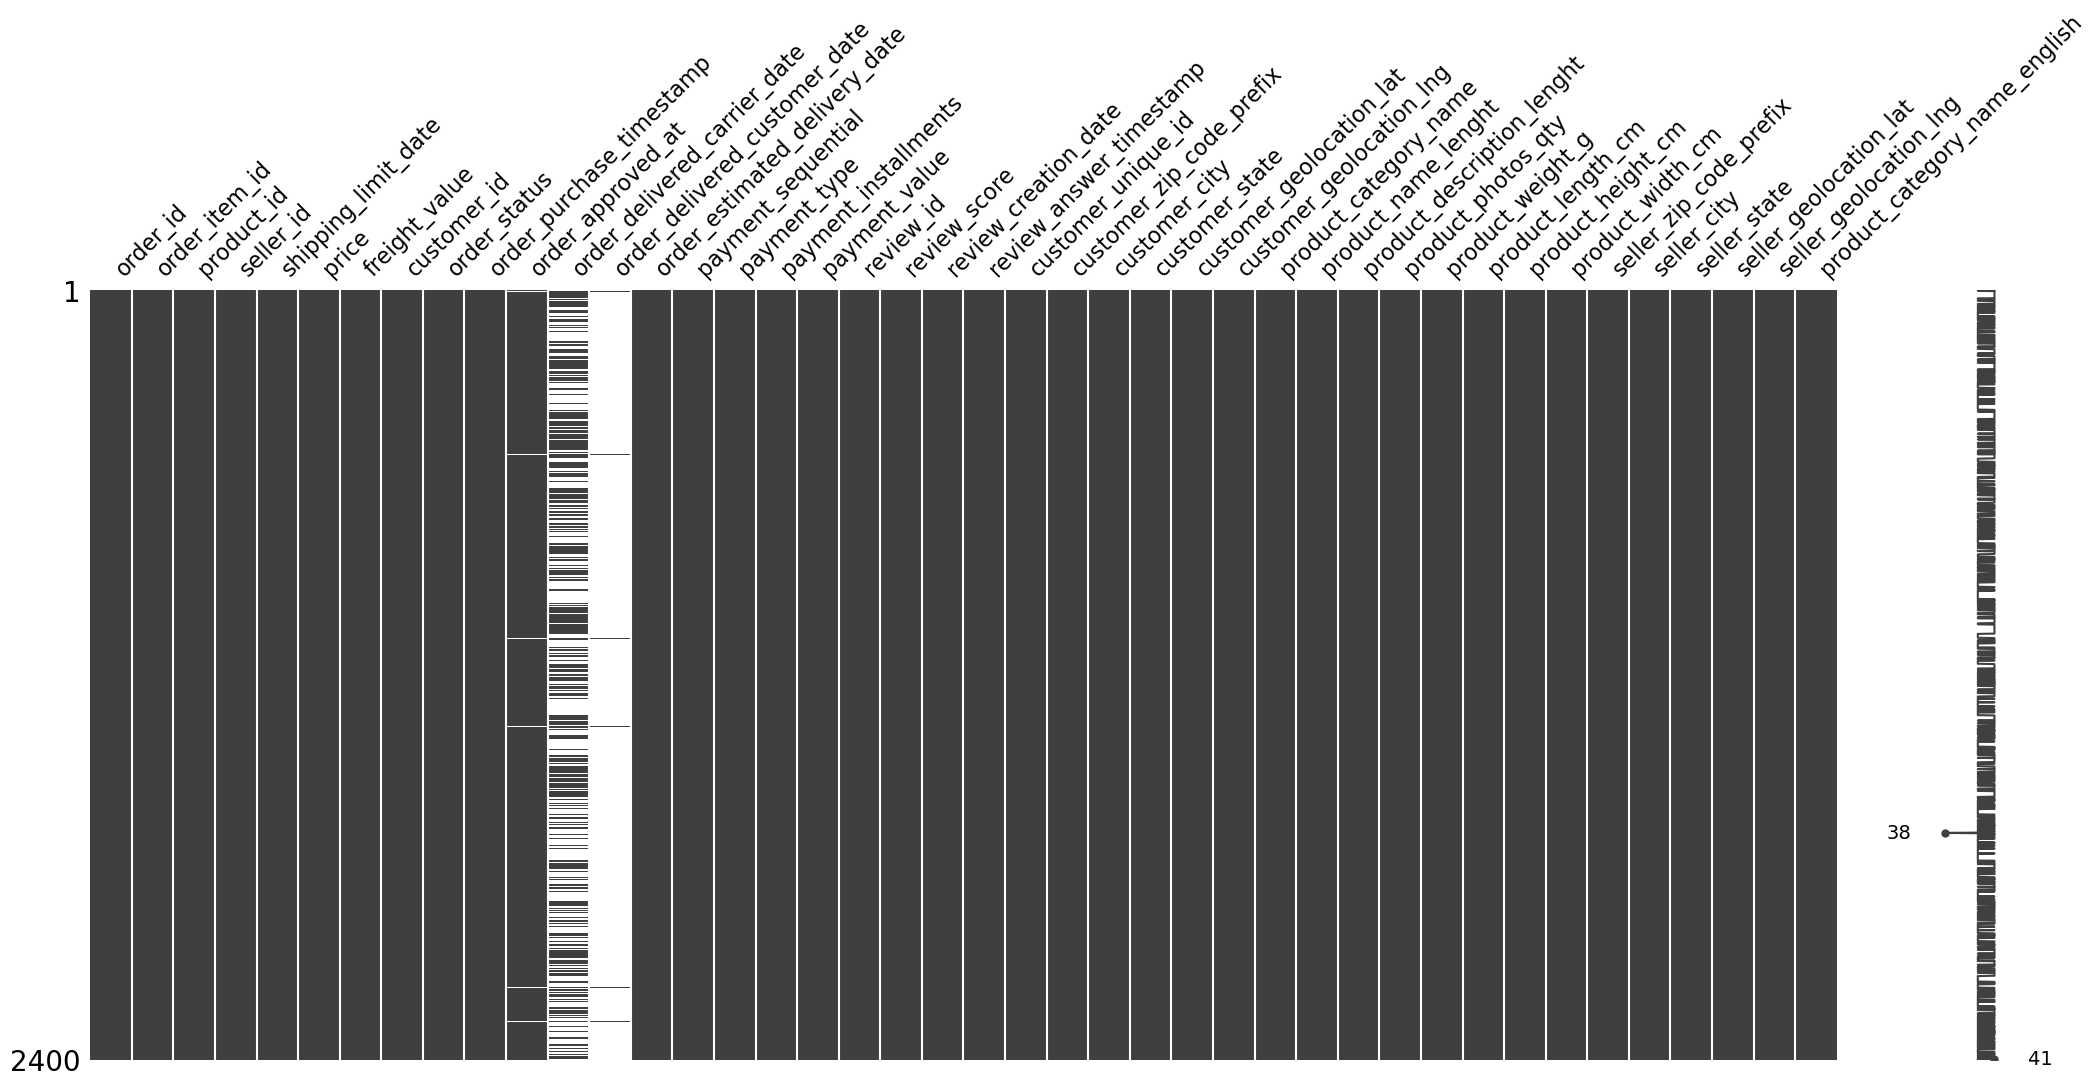

In [11]:
import missingno as msno

# null 데이터가 들어있는 비중 시각화
# 결측치가 없으면 색으로, 결측치가 있으면 흰색으로 시각화

# null_rows_selector가 True로 표시된 행만 선택
filtered_rows = df_no_duplicates[null_rows_selector]

# df_null의 인덱스를 사용하여 필요한 컬럼만 선택
msno.matrix(filtered_rows)

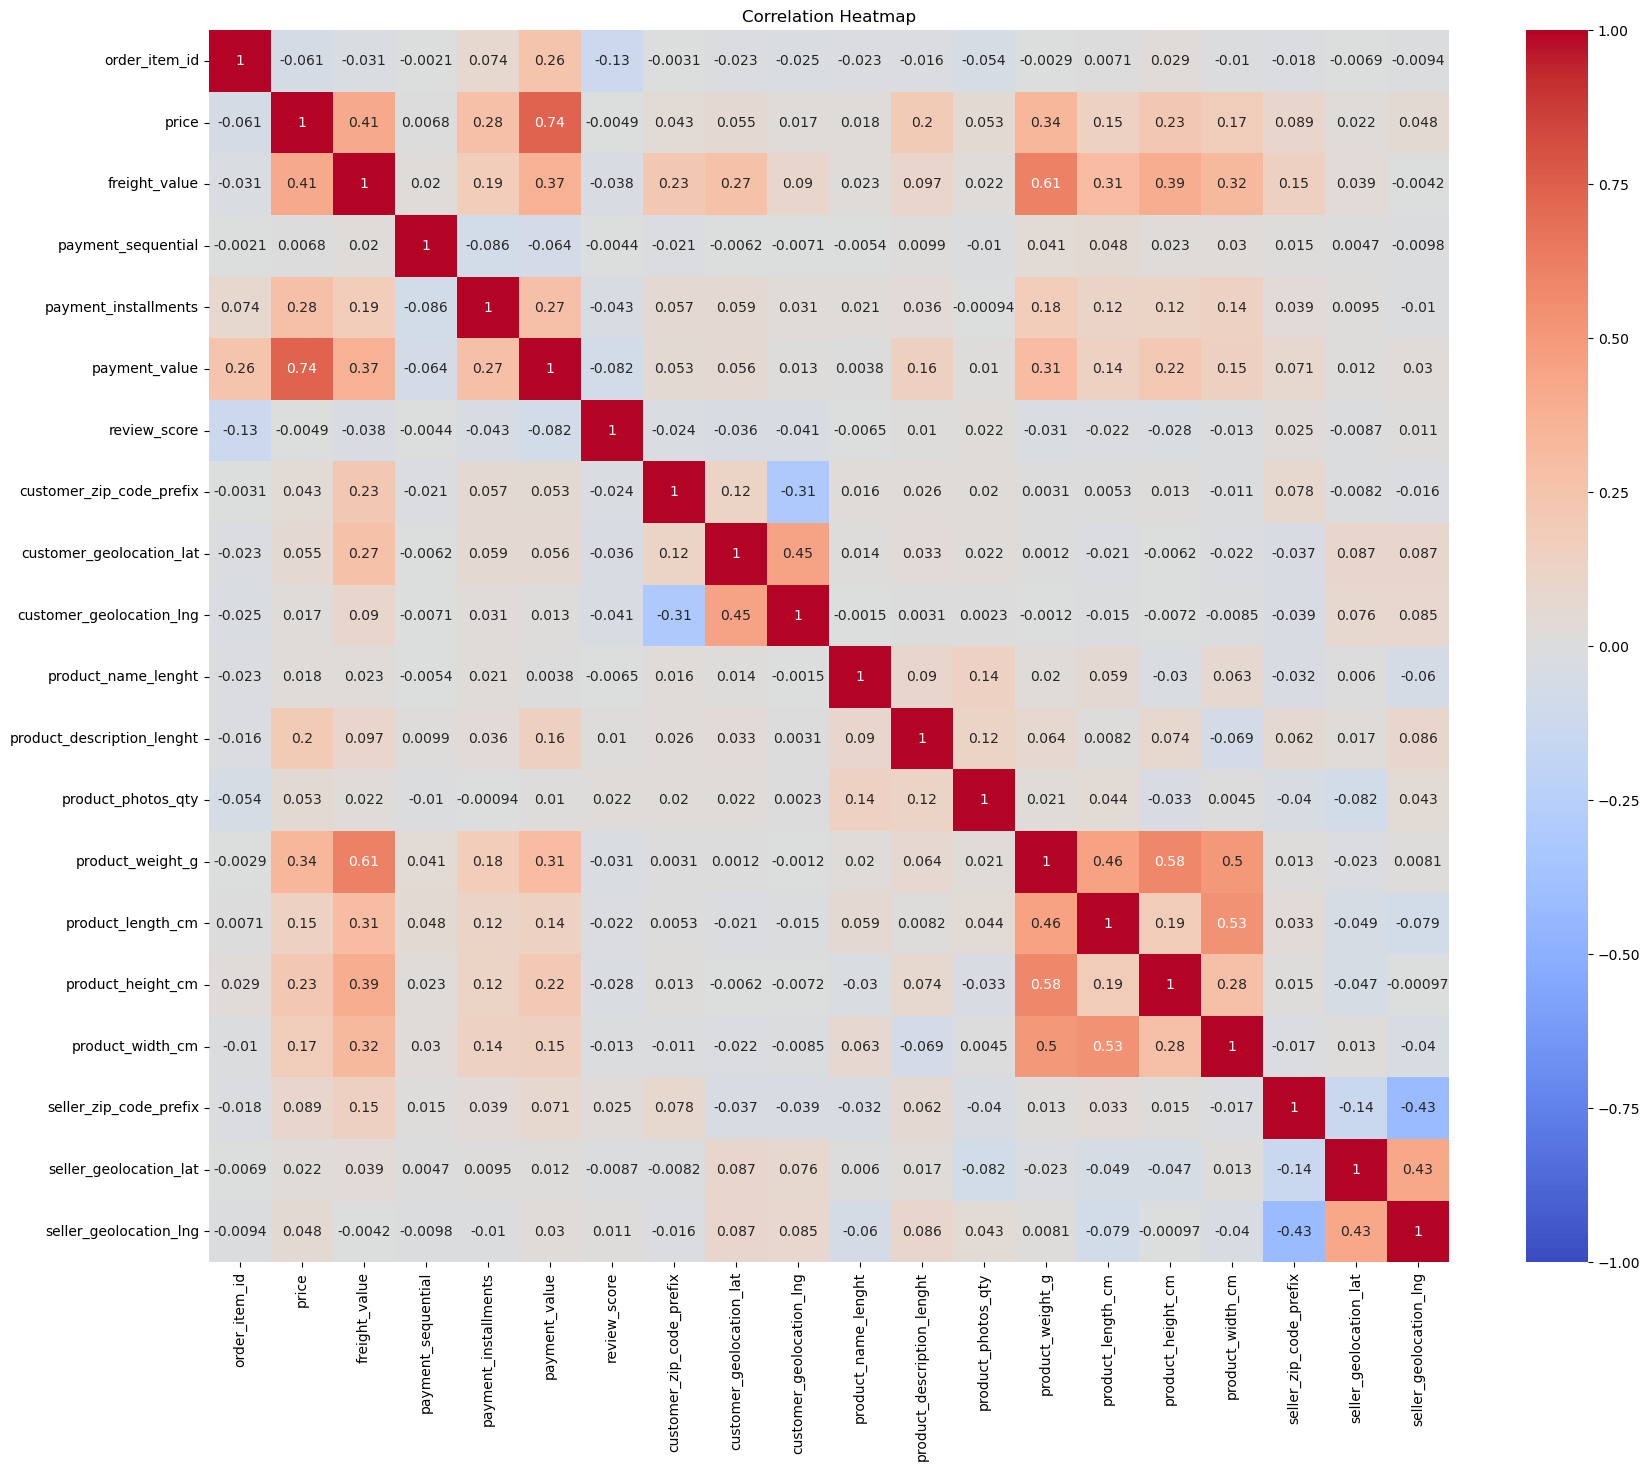

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr = df_no_duplicates.corr()

# Visualize using heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

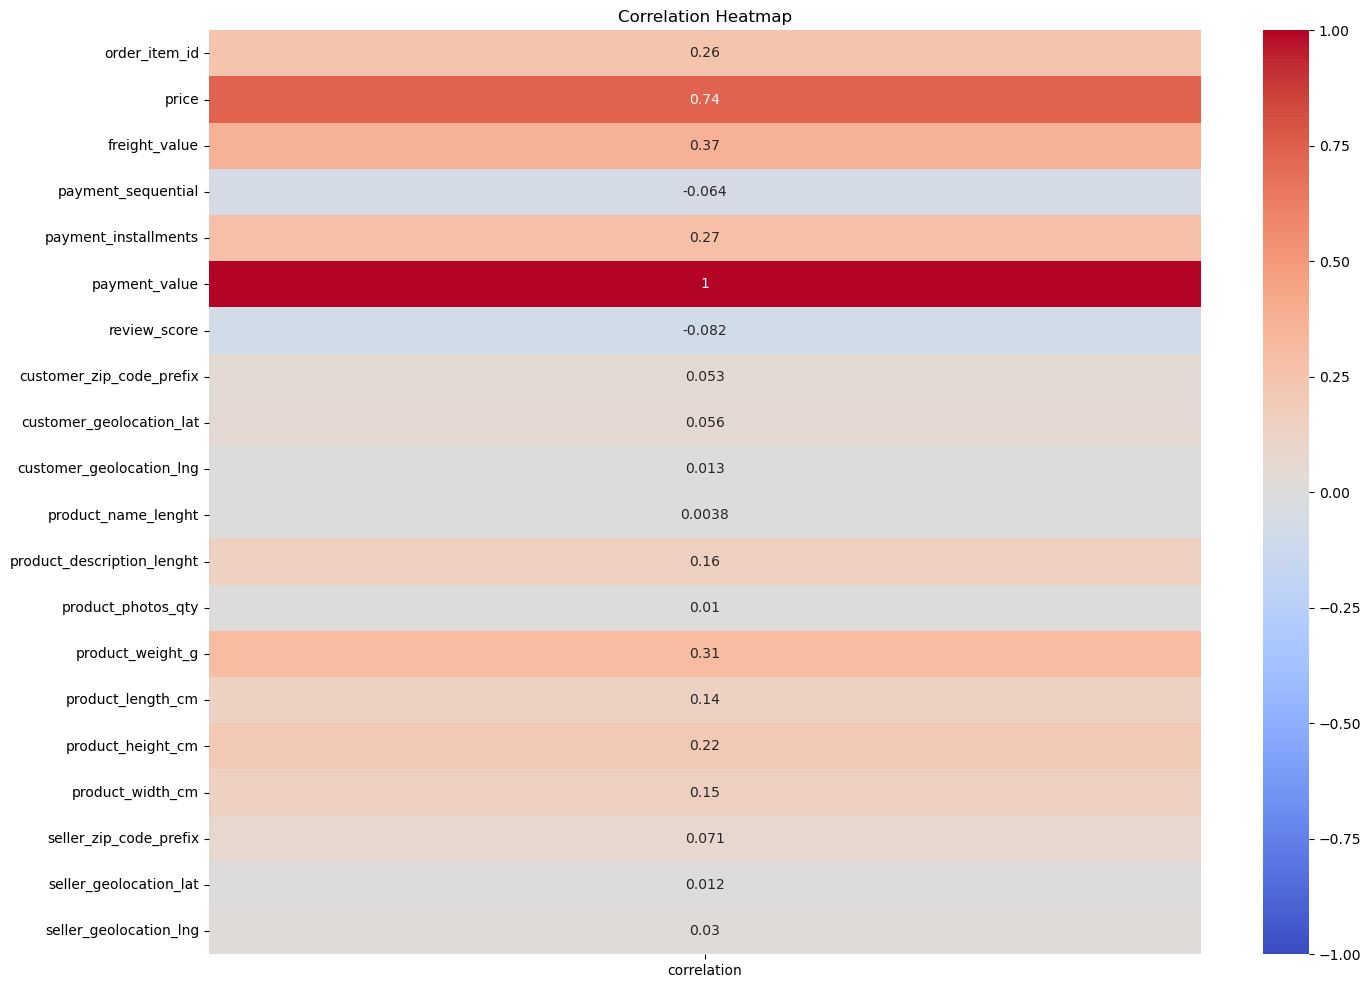

In [13]:
# Calculate correlation
corr = df_no_duplicates.corrwith(df_no_duplicates['payment_value']).to_frame(name='correlation')

# Visualize using heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

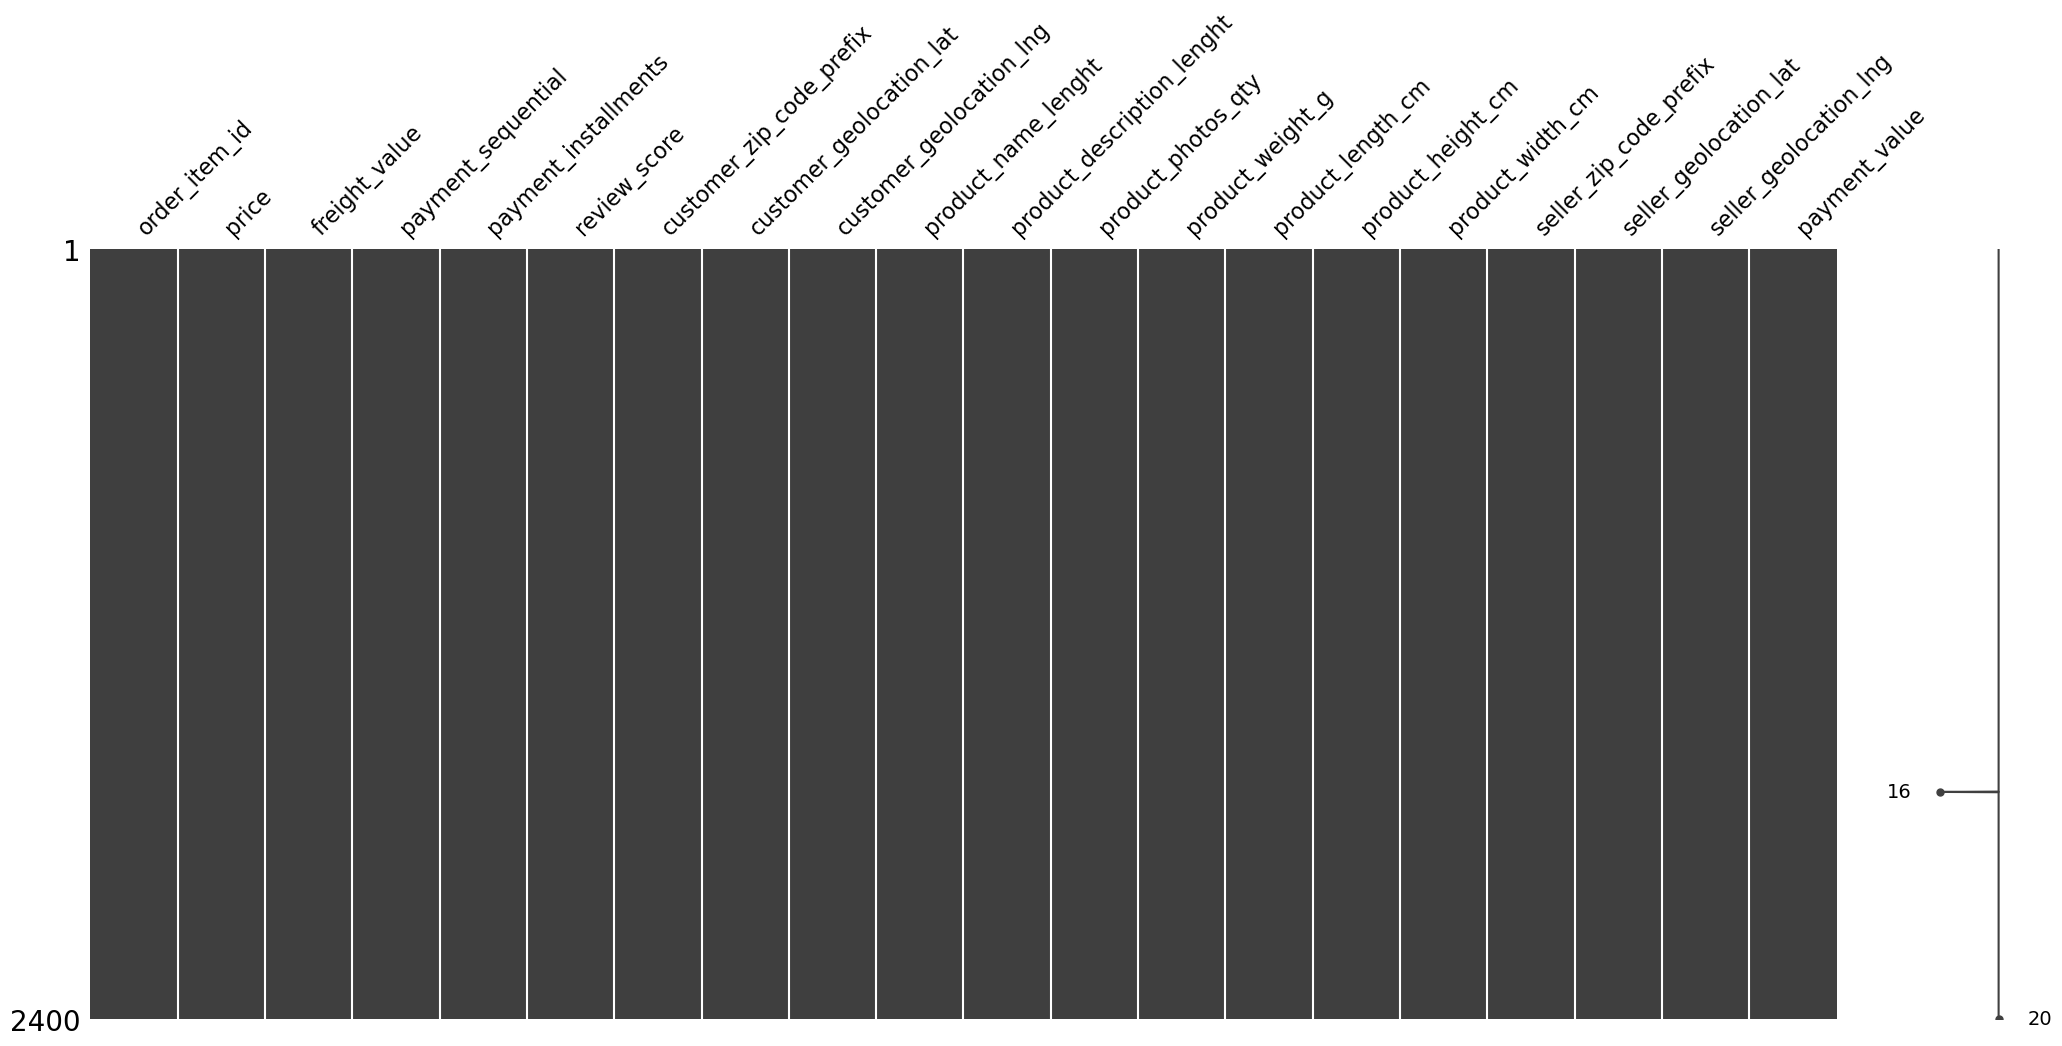

In [14]:
# 상관 분석에서 상위 랭크에 포함된 컬럼들만 선별
# df_regression = df_no_duplicates[['payment_sequential', 'payment_installments', 'payment_value', 'customer_zip_code_prefix',
#                  'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'seller_zip_code_prefix',
#                  'order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght',
#                  'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
#                  'review_score']]
df_regression = df_no_duplicates[['order_item_id', 'price', 'freight_value', 'payment_sequential',
                 'payment_installments', 'review_score', 'customer_zip_code_prefix', 'customer_geolocation_lat',
                 'customer_geolocation_lng', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
                 'seller_geolocation_lat', 'seller_geolocation_lng', 'payment_value']]

# null_rows_selector가 True로 표시된 행만 선택
filtered_rows = df_regression[null_rows_selector]

# df_null의 인덱스를 사용하여 필요한 컬럼만 선택
msno.matrix(filtered_rows)

In [15]:
# 결측치 처리: 회귀 문제에서는 평균, 중앙값 또는 보간법을 사용해 결측치를 처리할 수 있습니다.
# 여기에서는 수치형 특성의 결측치를 평균값으로 채우고, 범주형 특성의 결측치는 'Unknown'으로 채우겠습니다.
# 가격(price) 컬럼의 결측치는 특히 중요하므로 따로 처리하겠습니다.

numeric_features = df_regression.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_regression.select_dtypes(include=['object']).columns

df_regression[numeric_features] = df_regression[numeric_features].fillna(df_regression[numeric_features].interpolate(method='linear'))
df_regression[categorical_features] = df_regression[categorical_features].fillna('Unknown')

# payment_value 컬럼의 결측치 처리: 여기에서는 중앙값으로 처리하겠습니다.
df_regression['payment_value'] = df_regression['payment_value'].fillna(df_regression['payment_value'].median())

In [16]:
import statsmodels.api as sm

# 데이터 샘플링
sample_df = df_regression.sample(frac=0.2, random_state=42)
X = sample_df.drop('payment_value', axis=1)
y = sample_df['payment_value']

# 모델 적합
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1614.
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:00:39   Log-Likelihood:            -1.5444e+05
No. Observations:               23007   AIC:                         3.089e+05
Df Residuals:                   22987   BIC:                         3.091e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -82.5219     33.560     -2.459      0.014    -148.301     -16.743
order_item_id                130.7141      2.002     65.304      0.000     126.791     134.637
price                          1.1089      0.008    137.071      0.000       1.093       1.125
freight_value                  0.7636      0.128      5.985      0.000       0.514       1.014
payment_sequential           -27.1366      1.874    -14.480      0.000     -30.810     -23.463
payment_installments           0.5435      0.503      1.081      0.280      -0.442       1.529
review_score                  -8.2937      0.966     -8.583      0.000     -10.188      -6.400
customer_zip_code_prefix    6.869e-05   5.06e-05      1.358      0.175   -3.05e-05       0.000
customer_geolocation_lat       0.5043      0.291      1.731      0.083      -0.067       1.075
customer_geolocation_lng       0.0228      0.404      0.056      0.955      -0.770       0.816
product_name_lenght           -0.2183      0.135     -1.618      0.106      -0.483       0.046
product_description_lenght     0.0054      0.002      2.602      0.009       0.001       0.010
product_photos_qty            -1.9373      0.790     -2.454      0.014      -3.485      -0.390
product_weight_g               0.0010      0.001      1.667      0.096      -0.000       0.002
product_length_cm              0.0292      0.100      0.292      0.770      -0.167       0.226
product_height_cm              0.1485      0.123      1.205      0.228      -0.093       0.390
product_width_cm              -0.0371      0.143     -0.261      0.794      -0.317       0.242
seller_zip_code_prefix      4.633e-05   5.46e-05      0.849      0.396   -6.06e-05       0.000
seller_geolocation_lat        -0.0912      0.555     -0.164      0.869      -1.178       0.996
seller_geolocation_lng        -0.5408      0.696     -0.777      0.437      -1.904       0.823
==============================================================================
Omnibus:                    63390.162   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3476349851.843
Skew:                          34.827   Prob(JB):                         0.00
Kurtosis:                    1906.034   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* OLS (Ordinary Least Squares) : OLS는 선형 회귀 모델로서 여러 독립 변수들과 종속 변수 간의 관계를 선형적으로 모델링합니다. 시계열적인 성질 (계절성, 추세, 주기성 등)을 고려하지 않습니다. 추가적인 피처들 (예: 프로모션, 휴일, 경쟁사의 가격 변동 등)이 있고 그 피처들이 매출에 큰 영향을 미친다고 판단되면 OLS를 사용할 수 있습니다.
####
* ARIMA (AutoRegressive Integrated Moving Average) : ARIMA는 시계열 데이터에 대한 모델로, 자기 자신의 과거 값을 사용하여 미래 값을 예측합니다. 시계열의 추세, 계절성 등을 고려하여 예측합니다. 외부 피처들을 직접 포함시키기 어렵습니다 (하지만, SARIMAX와 같은 확장 모델을 사용하면 가능합니다). 매출액 데이터에 명확한 계절성, 추세가 있을 경우 ARIMA와 같은 시계열 모델이 적합할 수 있습니다.
####
* 결론적으로: 매출액 데이터에 시계열적 특성 (추세, 계절성, 주기성)이 강하게 나타나면 ARIMA나 그 변형 (예: SARIMAX)을 사용하는 것이 좋습니다. 여러 추가적인 피처들이 있고, 그 피처들이 매출에 큰 영향을 미친다고 판단될 때, 또는 데이터에 시계열적 특성이 뚜렷하지 않다면 OLS나 다른 회귀 모델을 사용하는 것도 고려해볼 수 있습니다. 사용하는 모델이 중요한 것도 있지만, 데이터의 특성을 정확히 파악하고 전처리하는 과정도 매우 중요합니다. 가능하다면 여러 모델을 시도해보고 검증하여 가장 적합한 모델을 선택하는 것이 좋습니다.

In [17]:
# 매출액의 추세를 예측해야하므로 선형 회귀방식이 적용되어야 한다.
# 분류 문제가 아니다.

import statsmodels.api as sm

def linear_regression_test(X, y, alpha=0.05):
    regression_list = []
    results_list = []
    target = y.name

    for index, col in X.select_dtypes(exclude=['object']).columns.to_series().items():
        X_col = sm.add_constant(X[col].dropna())  # add a constant for the intercept(절편)
        y_matched = y.loc[X_col.index]
        
        model = sm.OLS(y_matched, X_col)
        result = model.fit()
        
        coef_pvalue = result.pvalues[col]
        results_list.append([target, col, result.params[col], coef_pvalue,
                             'Significant' if coef_pvalue <= alpha else 'Not significant',
                             'include' if coef_pvalue <= alpha else 'drop'])
        if coef_pvalue <= alpha:
            regression_list.append(col)
    results_df = pd.DataFrame(results_list, columns=['dependent', 'independent', 'coefficient', 'p-value', 'result', 'recommendation'])
    return results_df, regression_list

results_df, regression_list = linear_regression_test(X, df_regression['payment_value'])
results_df

,dependent,independent,coefficient,p-value,result,recommendation
0,payment_value,const,174.059414,0.000000e+00,Significant,include
1,payment_value,order_item_id,116.168270,0.000000e+00,Significant,include
2,payment_value,price,1.123776,0.000000e+00,Significant,include
3,payment_value,freight_value,6.327917,0.000000e+00,Significant,include
4,payment_value,payment_sequential,-24.343209,9.985422e-18,Significant,include
5,payment_value,payment_installments,25.259242,6.646568e-275,Significant,include
6,payment_value,review_score,-19.412729,1.148305e-40,Significant,include
7,payment_value,customer_zip_code_prefix,0.000452,1.440600e-11,Significant,include
8,payment_value,customer_geolocation_lat,2.474041,6.599281e-12,Significant,include
9,payment_value,customer_geolocation_lng,0.959504,5.253469e-02,Not significant,drop


In [18]:
regression_list.remove('const')
regression_list.append('payment_value')
regression_list

['order_item_id',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'review_score',
 'customer_zip_code_prefix',
 'customer_geolocation_lat',
 'product_description_lenght',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'seller_geolocation_lng',
 'payment_value']

<Axes: >

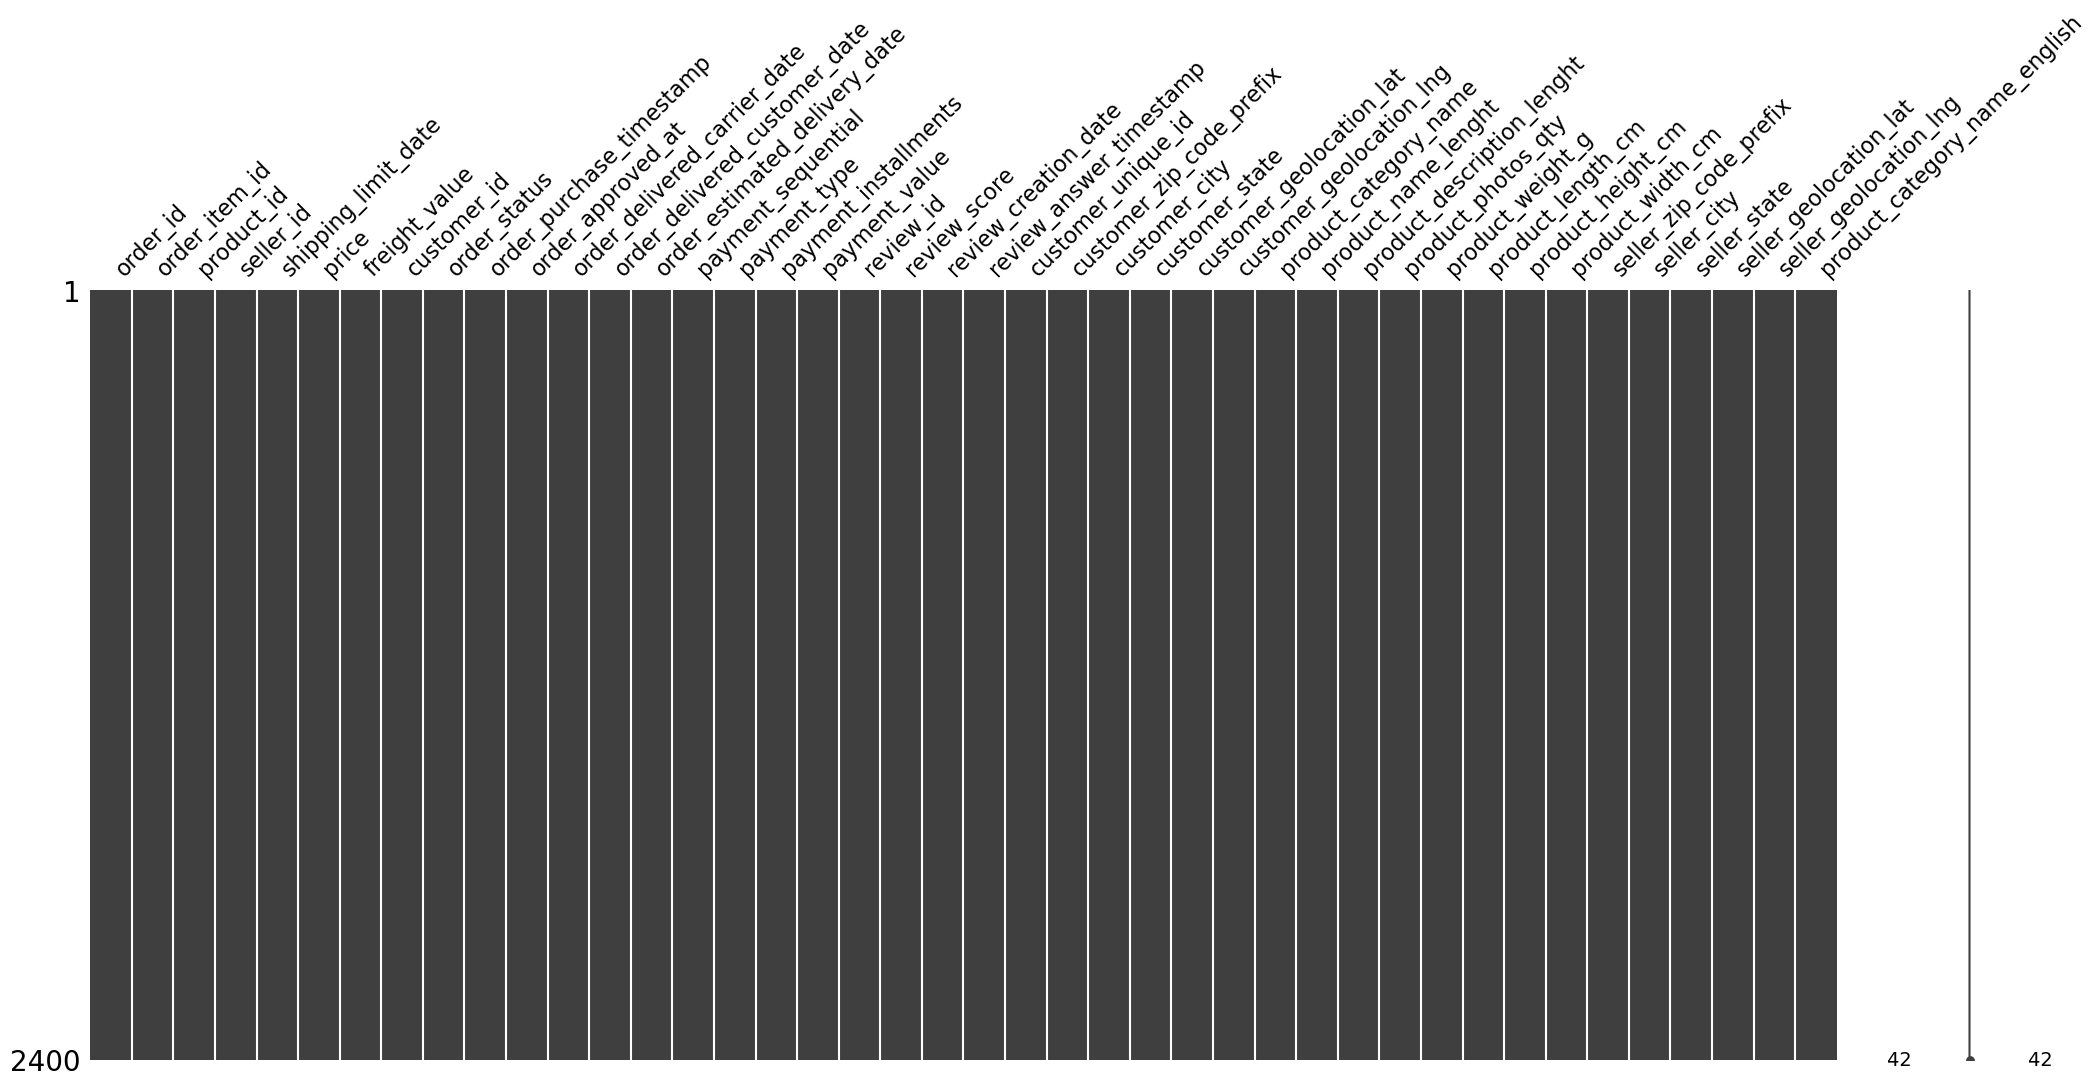

In [19]:
numeric_features = df_no_duplicates.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_no_duplicates.select_dtypes(include=['object']).columns

df_no_duplicates[numeric_features] = df_no_duplicates[numeric_features].fillna(df_no_duplicates[numeric_features].interpolate(method='linear'))
df_no_duplicates[categorical_features] = df_no_duplicates[categorical_features].fillna('Unknown')

# payment_value 컬럼의 결측치 처리: 여기에서는 중앙값으로 처리하겠습니다.
df_no_duplicates['payment_value'] = df_no_duplicates['payment_value'].fillna(df_no_duplicates['payment_value'].median())

# null_rows_selector가 True로 표시된 행만 선택
filtered_rows = df_no_duplicates[null_rows_selector]

# df_null의 인덱스를 사용하여 필요한 컬럼만 선택
msno.matrix(filtered_rows)

In [20]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.preprocessing import LabelEncoder

def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred), "The length of true values and predicted values should be the same."
    log_true = np.log1p(y_true)  # log1p()는 log(1+x)를 계산
    log_pred = np.log1p(y_pred)
    squared_error = (log_true - log_pred) ** 2
    return np.sqrt(np.mean(squared_error))

def label_encode(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    return df

def time_series_forecasting(df):
    # 1. 시간 특성 엔지니어링
    df['year'] = df['order_purchase_timestamp'].dt.year
    df['month'] = df['order_purchase_timestamp'].dt.month
    df['day'] = df['order_purchase_timestamp'].dt.day
    df['weekday'] = df['order_purchase_timestamp'].dt.weekday
    
    # 롤링 평균 추가
    df['rolling_mean'] = df['payment_value'].rolling(window=7).mean().shift(1)
    
    # Lagged Features 추가 (1일, 2일, 3일 지연)
    for i in range(1, 6):
        df[f'payment_value_lag{i}'] = df['payment_value'].shift(i)
        
    # 시계열의 정상성 확인: 추세나 계절성이 있는 경우 차분 필요
    # 여기서는 1차 차분을 사용. 필요에 따라 다르게 조절 가능
    df['payment_value_diff'] = df['payment_value'].diff()
    df.dropna(inplace=True)  # 차분 후 NaN 값 제거
    
    # 데이터 스케일링
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    features = ['rolling_mean', 'payment_value_lag1', 'payment_value_lag2', 'payment_value_lag3', 'payment_value_lag4', 'payment_value_lag5']
    df[features] = scaler_X.fit_transform(df[features])
    df['payment_value_diff'] = scaler_y.fit_transform(df[['payment_value_diff']])
    
    # 결측값 제거
    df.dropna(inplace=True)
    
    # 3. 시간 기반 데이터 분할
    train = df[df['order_purchase_timestamp'] <= '2018-05-12']
    test = df[df['order_purchase_timestamp'] > '2018-05-12']
    
    X_train = train[features]
    y_train = train['payment_value_diff']
    X_test = test[features]
    y_test = test['payment_value_diff']
    
    # 4.모델 학습 및 하이퍼파라미터 최적화
    model_lgbm = LGBMRegressor(n_estimators=64, random_state=42)
    model_xgb = XGBRegressor(n_estimators=106, random_state=42)
    model_cat = CatBoostRegressor(n_estimators=90, random_state=42, verbose=0)  # verbose=0은 학습 과정의 출력을 숨깁니다.
    
    model_lgbm.fit(X_train, y_train)
    model_xgb.fit(X_train, y_train)
    model_cat.fit(X_train, y_train)
    
    predictions_lgbm = model_lgbm.predict(X_test)
    predictions_xgb = model_xgb.predict(X_test)
    predictions_cat = model_cat.predict(X_test)
    
    # 5. 성능 평가
    mae_lgbm = mean_absolute_error(y_test, predictions_lgbm)
    mse_lgbm = mean_squared_error(y_test, predictions_lgbm)
    rmse_lgbm = np.sqrt(mse_lgbm)
    r2_lgbm = r2_score(y_test, predictions_lgbm)
    
    mae_xgb = mean_absolute_error(y_test, predictions_xgb)
    mse_xgb = mean_squared_error(y_test, predictions_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test, predictions_xgb)
    
    mae_cat = mean_absolute_error(y_test, predictions_cat)
    mse_cat = mean_squared_error(y_test, predictions_cat)
    rmse_cat = np.sqrt(mse_cat)
    r2_cat = r2_score(y_test, predictions_cat)
    
    # 성능 평가 부분에서 RMSLE 추가
    rmsle_lgbm = rmsle(y_test, predictions_lgbm)
    rmsle_xgb = rmsle(y_test, predictions_xgb)
    rmsle_cat = rmsle(y_test, predictions_cat)

    metrics = pd.DataFrame({
        "Metric": ['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE'],
        "LightGBM": [mae_lgbm, mse_lgbm, rmse_lgbm, r2_lgbm, rmsle_lgbm],
        "XGBoost": [mae_xgb, mse_xgb, rmse_xgb, r2_xgb, rmsle_xgb],
        "CatBoost": [mae_cat, mse_cat, rmse_cat, r2_cat, rmsle_cat]
    })
    
    # 가장 좋은 모델 선택 (RMSE를 기준으로)
    best_rmse = min(rmse_lgbm, rmse_xgb, rmse_cat)
    
    if best_rmse == rmse_lgbm:
        best_model = model_lgbm
    elif best_rmse == rmse_xgb:
        best_model = model_xgb
    else:
        best_model = model_cat
    
    return metrics, model_lgbm, model_xgb, model_cat, best_model

df_test = df_no_duplicates[df_no_duplicates.select_dtypes(include=['float64', 'int64']).columns]
df_test['order_purchase_timestamp'] = df_no_duplicates['order_purchase_timestamp']
df_test.sort_values(by='order_purchase_timestamp', ascending=True, inplace=True)
df_test['order_purchase_timestamp'] = pd.to_datetime(df_test['order_purchase_timestamp'])


df_test = label_encode(df_test)

results, lgbm, xgb, cat, best_model = time_series_forecasting(df_test)

results

,Metric,LightGBM,XGBoost,CatBoost
0,MAE,0.427803,0.438702,0.432487
1,MSE,0.756497,0.828500,0.782560
2,RMSE,0.869768,0.910220,0.884624
3,R2,0.327523,0.263516,0.304354
4,RMSLE,0.550963,0.550925,0.532383


In [21]:
df_test

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,...,month,day,weekday,rolling_mean,payment_value_lag1,payment_value_lag2,payment_value_lag3,payment_value_lag4,payment_value_lag5,payment_value_diff
63681,1,36.49,17.24,1,1,53.73,3,90040,-30.041161,-51.213661,...,10,3,0,-0.544023,-0.513892,-0.500818,-0.476890,-0.236931,-0.365690,0.064561
12879,1,119.90,13.56,1,6,133.46,1,13185,-22.892792,-47.173849,...,10,3,0,-0.615281,-0.445826,-0.513890,-0.500818,-0.476892,-0.236919,0.284091
114739,1,29.99,10.96,1,4,40.95,5,12030,-23.032142,-45.570461,...,10,3,0,-0.617673,-0.146326,-0.445824,-0.513891,-0.500820,-0.476881,-0.329637
7506,1,128.90,25.67,1,2,154.57,5,76700,-14.751274,-50.568165,...,10,3,0,-0.647135,-0.493833,-0.146324,-0.445824,-0.513893,-0.500809,0.404848
12899,1,74.90,17.37,1,3,92.27,1,35162,-19.468787,-42.563895,...,10,3,0,-0.608068,-0.067028,-0.493831,-0.146325,-0.445826,-0.513882,-0.221992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111304,1,209.00,46.48,1,8,510.96,5,80045,-25.425730,-49.253916,...,8,29,2,0.253367,1.271724,-0.373062,-0.199065,-0.593980,0.021938,-0.000004
72299,1,45.90,15.39,1,1,61.29,5,38600,-17.224179,-46.874265,...,8,29,2,0.265209,1.271724,1.271725,-0.373063,-0.199067,-0.593969,-1.602274
113593,1,24.90,8.33,1,1,33.23,3,9541,-23.620206,-46.564145,...,8,29,2,0.225771,-0.417427,1.271725,1.271724,-0.373064,-0.199054,-0.099988
35986,1,84.99,8.76,1,1,93.75,5,13483,-22.560755,-47.446494,...,8,29,2,0.100514,-0.522833,-0.417425,1.271724,1.271724,-0.373052,0.215642


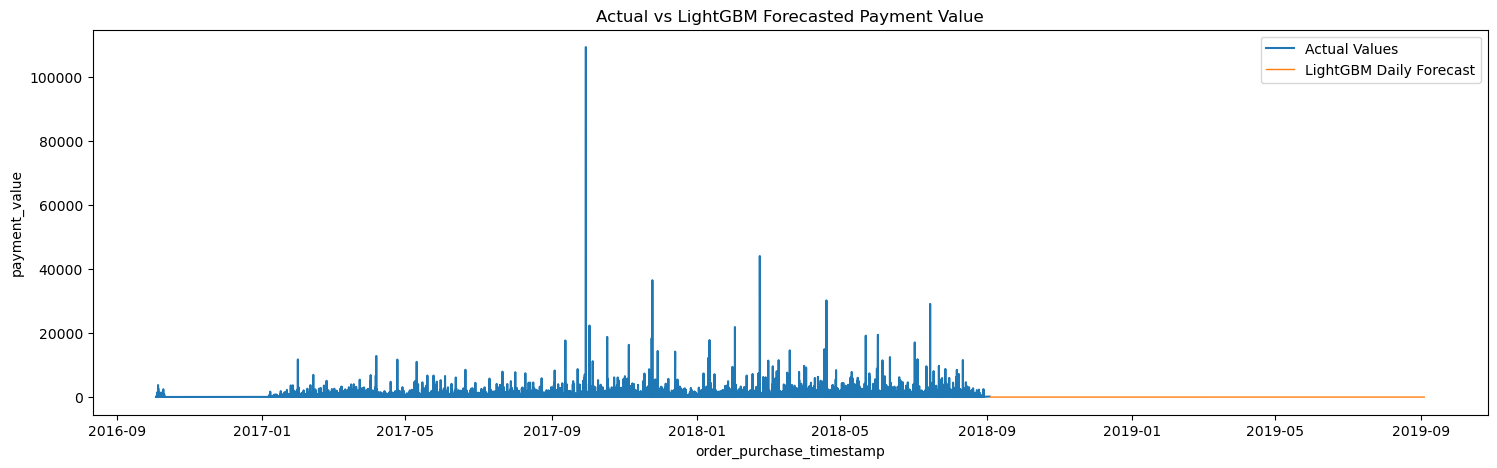

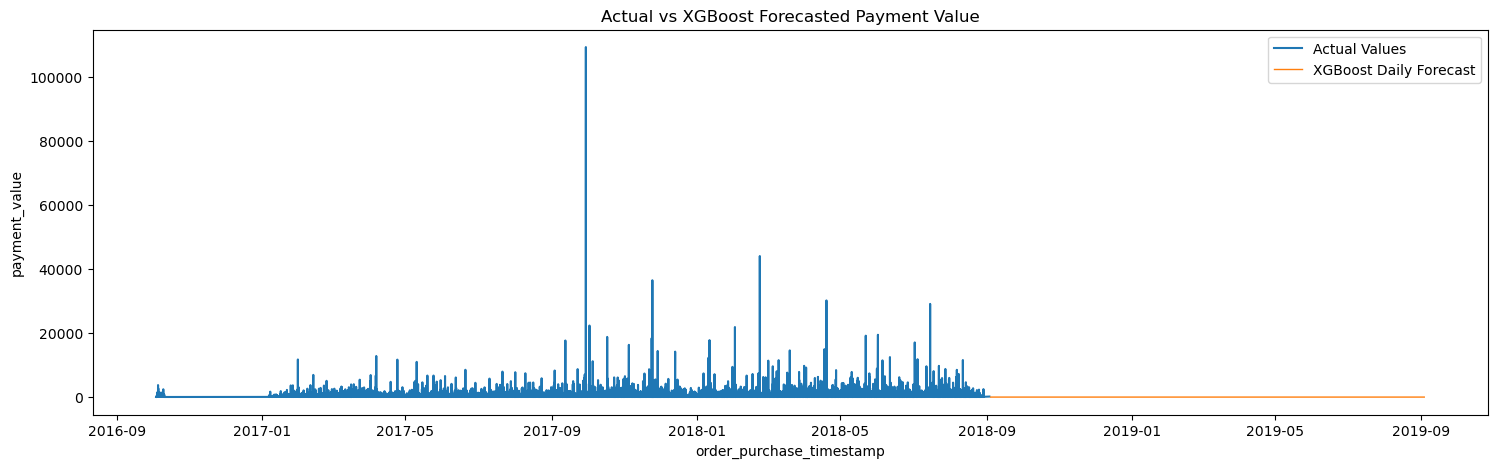

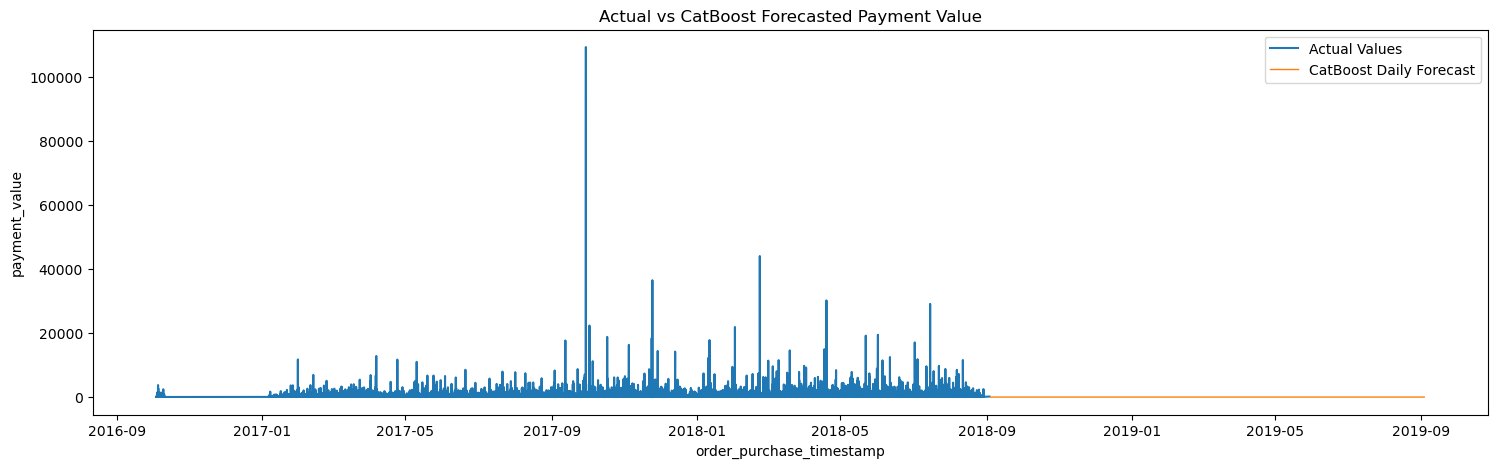

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def convert_to_numeric(data):

    columns_to_convert = ['customer_geolocation_lng', 'product_name_lenght', 'product_photos_qty', 'seller_geolocation_lat', 
                          'price', 'freight_value', 'payment_sequential', 'payment_installments', 'review_score',
                          'customer_zip_code_prefix', 'customer_geolocation_lat', 'product_description_lenght',
                          'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                          'seller_zip_code_prefix', 'seller_geolocation_lng', 'payment_value', 'year', 'month', 'day', 
                          'weekday', 'rolling_mean', 'payment_value_lag1', 'payment_value_lag2', 'payment_value_lag3',
                          'payment_value_lag4', 'payment_value_lag5', 'payment_value']
    
    if isinstance(data, pd.DataFrame):
        for col in columns_to_convert:
            if col in data.columns:
                data[col] = pd.to_numeric(data[col], errors='coerce')
    elif isinstance(data, pd.Series):
        for col in columns_to_convert:
            if col in data.index:
                data[col] = pd.to_numeric(data[col], errors='coerce')

    return data

def add_missing_features(data, model_features):
    for feature in model_features:
        if feature not in data.columns:
            data[feature] = 0
    return data

def get_feature_names(model):
    if isinstance(model, (CatBoostRegressor)):
        return model.feature_names_
    elif isinstance(model, (LGBMRegressor)):
        return model.feature_name_
    elif isinstance(model, (XGBRegressor)):
        return model.get_booster().feature_names
    elif isinstance(model, (ARIMA)):
        return ['order_purchase_timestamp'] # this could just be a placeholder
    else:
        raise ValueError("Model type not supported")


def forecast_period(df, model, n_periods):
    feature_names = get_feature_names(model)
    last_data = df.iloc[-1:].copy()
    last_data = add_missing_features(last_data, feature_names)
    last_data = last_data.iloc[0]
    last_data['payment_value_lag1'] = df['payment_value'].iloc[-2]
    last_data['payment_value_lag2'] = df['payment_value'].iloc[-3]
    last_data['payment_value_lag3'] = df['payment_value'].iloc[-4]
    last_data['payment_value_lag4'] = df['payment_value'].iloc[-5]
    last_data['payment_value_lag5'] = df['payment_value'].iloc[-6]

    forecasted_values = []

    for _ in range(n_periods):
        # 날짜 업데이트
        last_timestamp = last_data['order_purchase_timestamp']
        new_timestamp = last_timestamp + pd.DateOffset(days=1)
        
        # 시간 관련 특성 업데이트
        last_data['year'] = new_timestamp.year
        last_data['month'] = new_timestamp.month
        last_data['day'] = new_timestamp.day
        last_data['weekday'] = new_timestamp.weekday()
        last_data['order_purchase_timestamp'] = new_timestamp

        last_data = convert_to_numeric(last_data)
        X = pd.DataFrame([last_data[feature_names]])

        if 'order_purchase_timestamp' in X.columns:
            X = X.drop(columns=['order_purchase_timestamp'])

        X = convert_to_numeric(X).iloc[0].values.reshape(1, -1)
        forecasted_value = model.predict(X)

        # 여기에서 지연 특성 업데이트
        # 여기에서 지연 특성 업데이트
        last_data['payment_value_lag5'] = last_data['payment_value_lag4']
        last_data['payment_value_lag4'] = last_data['payment_value_lag3']
        last_data['payment_value_lag3'] = last_data['payment_value_lag2']
        last_data['payment_value_lag2'] = last_data['payment_value_lag1']
        last_data['payment_value_lag1'] = last_data['payment_value']
        last_data['payment_value'] = forecasted_value
        
        forecasted_values.append(forecasted_value)

    last_timestamp = df['order_purchase_timestamp'].iloc[-1]
    forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(days=1), periods=n_periods)

    forecast_df = pd.DataFrame({
        'order_purchase_timestamp': forecast_dates,
        'forecasted_payment_value': forecasted_values
    })

    # Datetime으로 변환
    forecast_df['order_purchase_timestamp'] = pd.to_datetime(forecast_df['order_purchase_timestamp'])
    forecast_df['forecasted_payment_value'] = forecast_df['forecasted_payment_value'].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) and len(x) > 0 else x)
    forecast_df['forecasted_payment_value'] = forecast_df['forecasted_payment_value'].astype(float)
    forecast_df.dropna(subset=['forecasted_payment_value'], inplace=True)

    return forecast_df

        
def visualize_forecasts(df, models):
    for model_name, model in models.items():
        plt.figure(figsize=(18, 5))
        
        # 실제 값의 합계 계산
        aggregated_actual = df.groupby('order_purchase_timestamp').agg({'payment_value': 'sum'}).reset_index()
        
        # 실제 값 표시
        sns.lineplot(data=aggregated_actual, x='order_purchase_timestamp', y='payment_value', label='Actual Values')
        
        forecasted = forecast_period(df, model, n_periods=365)  # 일 단위로 365일 예측
        
        # 예측 값의 합계 계산
        aggregated_forecast = forecasted.groupby('order_purchase_timestamp').agg({'forecasted_payment_value': 'sum'}).reset_index()
        
        sns.lineplot(data=aggregated_forecast, x='order_purchase_timestamp', y='forecasted_payment_value', 
                     label=f'{model_name} Daily Forecast', linewidth=1)
        plt.title('Actual vs ' + model_name + ' Forecasted Payment Value')
        plt.legend()
        plt.show()

# 각 모델에 대한 예측 시각화
models = {
    "LightGBM": lgbm,
    "XGBoost": xgb,
    "CatBoost": cat
}

visualize_forecasts(df_test, models)


In [23]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.arima.model import ARIMA

from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    return df


def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred), "The length of true values and predicted values should be the same."
    log_true = np.log1p(y_true)  # log1p()는 log(1+x)를 계산
    log_pred = np.log1p(y_pred)
    squared_error = (log_true - log_pred) ** 2
    return np.sqrt(np.mean(squared_error))


def time_series_forecasting(df):
    # 1. 시간 특성 엔지니어링
    df['year'] = df['order_purchase_timestamp'].dt.year
    df['month'] = df['order_purchase_timestamp'].dt.month
    df['day'] = df['order_purchase_timestamp'].dt.day
    df['weekday'] = df['order_purchase_timestamp'].dt.weekday
    
    # 롤링 평균 추가
    df['rolling_mean'] = df['payment_value'].rolling(window=7).mean().shift(1)
    
    # Lagged Features 추가 (1일, 2일, 3일 지연)
    for i in range(1, 6):
        df[f'payment_value_lag{i}'] = df['payment_value'].shift(i)
        
    # 시계열의 정상성 확인: 추세나 계절성이 있는 경우 차분 필요
    # 여기서는 1차 차분을 사용. 필요에 따라 다르게 조절 가능
    df['payment_value_diff'] = df['payment_value'].diff()
    df.dropna(inplace=True)  # 차분 후 NaN 값 제거
    
    # 데이터 스케일링
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    features = ['rolling_mean', 'payment_value_lag1', 'payment_value_lag2', 'payment_value_lag3', 'payment_value_lag4', 'payment_value_lag5']
    df[features] = scaler_X.fit_transform(df[features])
    df['payment_value_diff'] = scaler_y.fit_transform(df[['payment_value_diff']])
    
    # 결측값 제거
    df.dropna(inplace=True)
    
    # 3. 시간 기반 데이터 분할
    train = df[df['order_purchase_timestamp'] <= '2018-05-12']
    test = df[df['order_purchase_timestamp'] > '2018-05-12']
    
    X_train = train[features]
    y_train = train['payment_value_diff']
    X_test = test[features]
    y_test = test['payment_value_diff']
    
    # 4.모델 학습 및 하이퍼파라미터 최적화
    model_arima = ARIMA(y_train, order=(1,1,1))

    predictions_arima = model_arima.fit().forecast(steps=len(X_test))
    
    # 5. 성능 평가
    mae_arima = mean_absolute_error(y_test, predictions_arima)
    mse_arima = mean_squared_error(y_test, predictions_arima)
    rmse_arima = np.sqrt(mse_arima)
    r2_arima = r2_score(y_test, predictions_arima)
    rmsle_arima = rmsle(y_test, predictions_arima)
    
    metrics = pd.DataFrame({
        "Metric": ['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE'],
        "ARIMA": [mae_arima, mse_arima, rmse_arima, r2_arima, rmsle_arima]
    })
    
    return metrics, model_arima

df_no_duplicates = df_no_duplicates[df_no_duplicates['review_creation_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['order_delivered_customer_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['order_delivered_carrier_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['shipping_limit_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['order_estimated_delivery_date'] != "Unknown"]
df_no_duplicates = df_no_duplicates[df_no_duplicates['order_purchase_timestamp'] != "Unknown"]

df_no_duplicates['review_creation_date'] = pd.to_datetime(df_no_duplicates['review_creation_date'])
df_no_duplicates['order_delivered_customer_date'] = pd.to_datetime(df_no_duplicates['order_delivered_customer_date'])
df_no_duplicates['order_delivered_carrier_date'] = pd.to_datetime(df_no_duplicates['order_delivered_carrier_date'])
df_no_duplicates['shipping_limit_date'] = pd.to_datetime(df_no_duplicates['shipping_limit_date'])
df_no_duplicates['order_estimated_delivery_date'] = pd.to_datetime(df_no_duplicates['order_estimated_delivery_date'])
df_no_duplicates['order_purchase_timestamp'] = pd.to_datetime(df_no_duplicates['order_purchase_timestamp'])

df_no_duplicates = label_encode(df_no_duplicates)

results, arima = time_series_forecasting(df_no_duplicates)

results

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Metric,ARIMA
0,MAE,0.389215
1,MSE,1.234732
2,RMSE,1.111185
3,R2,-0.000028
4,RMSLE,0.550671


AttributeError: 'ARIMA' object has no attribute 'get_prediction'

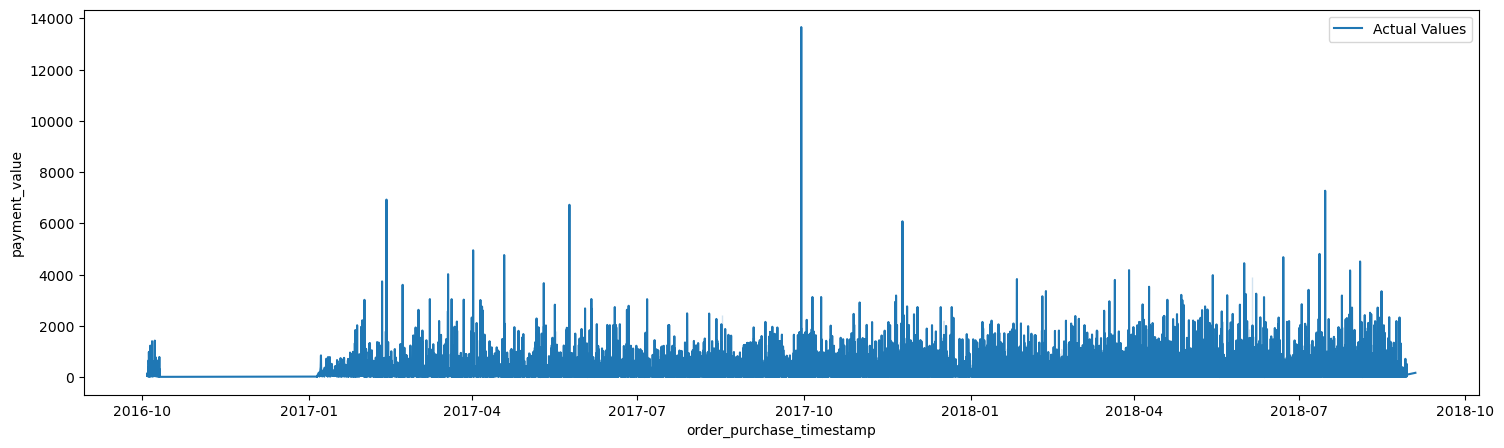

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA as ARIMA_new
from statsmodels.tsa.arima_model import ARIMA as ARIMA_old


def convert_to_numeric(data):

    columns_to_convert = ['customer_geolocation_lng', 'product_name_lenght', 'product_photos_qty', 'seller_geolocation_lat', 
                          'price', 'freight_value', 'payment_sequential', 'payment_installments', 'review_score',
                          'customer_zip_code_prefix', 'customer_geolocation_lat', 'product_description_lenght',
                          'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                          'seller_zip_code_prefix', 'seller_geolocation_lng', 'payment_value', 'year', 'month', 'day', 
                          'weekday', 'rolling_mean', 'payment_value_lag1', 'payment_value_lag2', 'payment_value_lag3',
                          'payment_value_lag4', 'payment_value_lag5', 'payment_value']
    
    if isinstance(data, pd.DataFrame):
        for col in columns_to_convert:
            if col in data.columns:
                data[col] = pd.to_numeric(data[col], errors='coerce')
    elif isinstance(data, pd.Series):
        for col in columns_to_convert:
            if col in data.index:
                data[col] = pd.to_numeric(data[col], errors='coerce')

    return data

def add_missing_features(data, model_features):
    for feature in model_features:
        if feature not in data.columns:
            data[feature] = 0
    return data

def get_feature_names(model):
    if isinstance(model, (ARIMA)):
        return ['order_purchase_timestamp'] # this could just be a placeholder
    else:
        raise ValueError("Model type not supported")

def forecast_period(df, model, n_periods):
    # ARIMA를 직접 참조하는 대신 ARIMA_new와 ARIMA_old를 참조하도록 수정
    if isinstance(model, (ARIMA_new, ARIMA_old)):
        return forecast_arima(df, model, n_periods)
    else:
        raise ValueError("Model type not supported")

def forecast_arima(df, model, n_periods):
    # ARIMA 참조를 제거하고 ARIMA_new와 ARIMA_old를 명확하게 참조하도록 수정
    if isinstance(model, ARIMA_new):
        forecast_results = model.get_prediction(steps=n_periods)
        forecasted_values = forecast_results.predicted_mean
    elif isinstance(model, ARIMA_old):
        forecasted_values, _, _ = model.forecast(steps=n_periods)
    else:
        raise ValueError("Unrecognized ARIMA model type")
    
    last_timestamp = df['order_purchase_timestamp'].iloc[-1]
    forecast_dates = pd.date_range(last_timestamp + pd.Timedelta(days=1), periods=n_periods)

    forecast_df = pd.DataFrame({
        'order_purchase_timestamp': forecast_dates,
        'forecasted_payment_value': forecasted_values
    })

    # Datetime으로 변환
    forecast_df['order_purchase_timestamp'] = pd.to_datetime(forecast_df['order_purchase_timestamp'])
    forecast_df['forecasted_payment_value'] = forecast_df['forecasted_payment_value'].astype(float)
    forecast_df.dropna(subset=['forecasted_payment_value'], inplace=True)

    return forecast_df

def visualize_forecasts(df, models):
    for model_name, model in models.items():
        plt.figure(figsize=(18, 5))
        
        # 실제 값 표시
        sns.lineplot(data=df, x='order_purchase_timestamp', y='payment_value', label='Actual Values')
        
        forecasted = forecast_period(df, model, n_periods=365)  # 일 단위로 365일 예측
        sns.lineplot(data=forecasted, x='order_purchase_timestamp', y='forecasted_payment_value', 
                     label=f'{model_name} Daily Forecast', linewidth=1)
        plt.title('Actual vs ' + model_name + ' Forecasted Payment Value')
        plt.legend()
        plt.show()

# 예측 시각화를 위한 모델 설정
models = {
    "ARIMA": arima
}

visualize_forecasts(df_test, models)
